In [88]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import sys; sys.path.insert(0, '/Users/erezcohen/Desktop/Software/mySoftware/Python/'); 
import sys; sys.path.insert(0, '/Users/erezcohen/Desktop/Software/TOFPET2/PETsysAnalysis/Python/'); 


from my_tools               import *; 
from plot_tools             import *;
from my_data_analysis_tools import *;
from PETsys_analysis_tools  import *;

%config InlineBackend.figure_format = 'retina'
main_data_path = '/Users/erezcohen/Desktop/data/PETsys/BoxSi_proto2.2/vth_1PE/'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

# $^{22}$Na event rates in proto2.2

In [89]:
event_rates = pd.read_csv(main_data_path + 'Na22_event_rate.csv')
event_rates = event_rates[1:]

In [90]:
event_rates
singles = event_rates[0:4]
doubles = event_rates[4:]

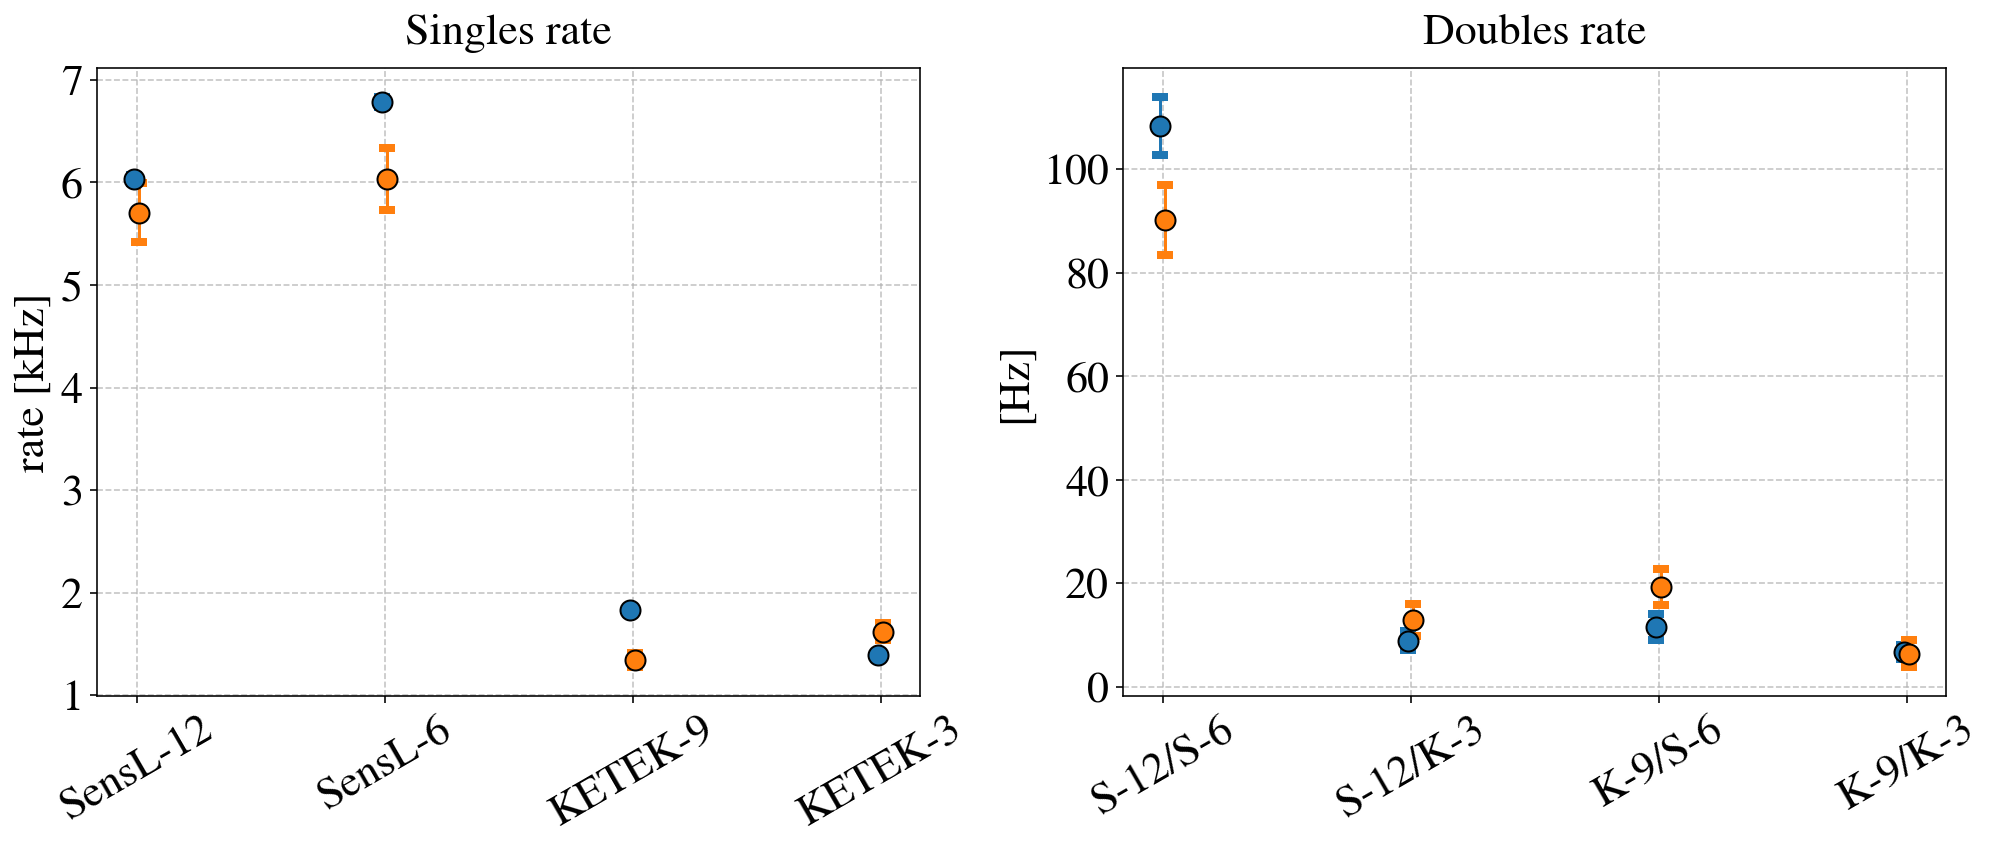

In [87]:
fontsize = 22
fig=plt.figure(figsize=(14,6))

for ax_idx,df,rate_label,xticks,yticks,scale in zip([1,2],
                                             [singles,doubles],
                                             ['Singles','Doubles'],
                                             [[1,2,3,4],[5,6,7,8]],
                                             [[1,10],[10,100]],
                                             [1e-3,1]):
    ax = fig.add_subplot(1,2,ax_idx)
    for xshift,rate_name in zip([-0.01,0.01],['r22Na','rMC']):
        x=np.array(df.index) + xshift
        y=np.array(df[rate_name],dtype=np.float)*scale
        yerr=np.array(df['Δ'+rate_name],dtype=np.float)*scale

        ax.errorbar( x=x, y=y,  yerr=yerr,
                    capsize=4,capthick=4,markersize=10,
                    marker='o',markeredgecolor='k',linestyle='None',);
        
    set_axes(ax,'',
             'rate [kHz]' if ax_idx==1 else '[Hz]',
             fontsize=fontsize,
             title=rate_label+' rate',do_add_grid=True)
    
    ax.set_xticks(xticks)
    ax.set_xticklabels(df.Detector,rotation=30);
#     ax.set_yscale('log')
#     ax.set_yticks(yticks)    
#     for tick in ax.yaxis.get_major_ticks(): tick.label.set_fontsize( fontsize )
#     for tick in ax.yaxis.get_minor_ticks(): tick.label.set_fontsize( fontsize )        
    
plt.tight_layout()